In [2]:
!pip install ipywidgets
import pandas as pd
import numpy as np
from scipy import stats

import ipywidgets as widgets
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv('/content/Crop_production.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [5]:
df.isna()/len(df)*100

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,False,False,False,False,False,False,False,False,False,False,False,False,False
99845,False,False,False,False,False,False,False,False,False,False,False,False,False
99846,False,False,False,False,False,False,False,False,False,False,False,False,False
99847,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
print(df[df['Crop'] == 'Cotton'])

Empty DataFrame
Columns: [Unnamed: 0, State_Name, Crop_Type, Crop, N, P, K, pH, rainfall, temperature, Area_in_hectares, Production_in_tons, Yield_ton_per_hec]
Index: []


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [10]:
df.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04,99849.000000
mean,49924.000000,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04,3.931149
std,28824.067851,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05,33.872242
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000
25%,24962.000000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02,0.586207
50%,49924.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03,1.329268
75%,74886.000000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04,2.997288
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [12]:

from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder to the 'Crop' column and transform it
df['Crop_Type_encoded'] = encoder.fit_transform(df[['Crop_Type']])
df['State_Name_encoded'] = encoder.fit_transform(df[['State_Name']])

# Display the DataFrame with the encoded column
df.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop_Type_encoded,State_Name_encoded
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,0.0,1.0
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,0.0,1.0
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,0.0,1.0
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,0.0,1.0
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,0.0,1.0


In [13]:
# Drop columns and assign the result back to df (or a new variable)
df = df.drop('Unnamed: 0', axis=1) # Specify axis=1 for columns explicitly
df = df.drop('State_Name', axis=1)
df = df.drop('Crop_Type', axis=1)
df = df.drop('Crop', axis=1)

# Now df has the dropped columns, and you can assign it to df1 if needed
df1 = df.copy() # Create a copy if you need a separate df1

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N                   99849 non-null  int64  
 1   P                   99849 non-null  int64  
 2   K                   99849 non-null  int64  
 3   pH                  99849 non-null  float64
 4   rainfall            99849 non-null  float64
 5   temperature         99849 non-null  float64
 6   Area_in_hectares    99849 non-null  float64
 7   Production_in_tons  99849 non-null  float64
 8   Yield_ton_per_hec   99849 non-null  float64
 9   Crop_Type_encoded   99849 non-null  float64
 10  State_Name_encoded  99849 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 8.4 MB


<Figure size 1500x1000 with 0 Axes>

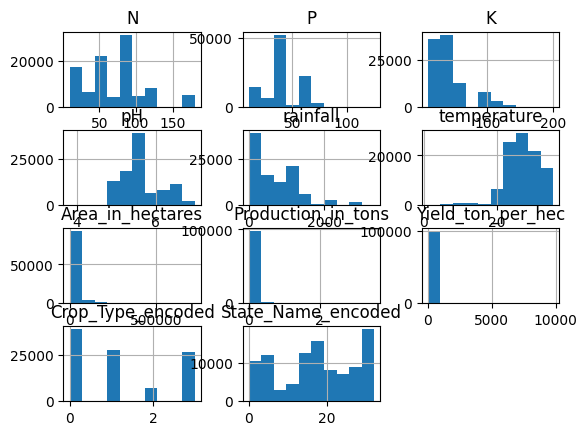

In [15]:
plt.figure(figsize=(15, 10))
df.hist()
plt.show()

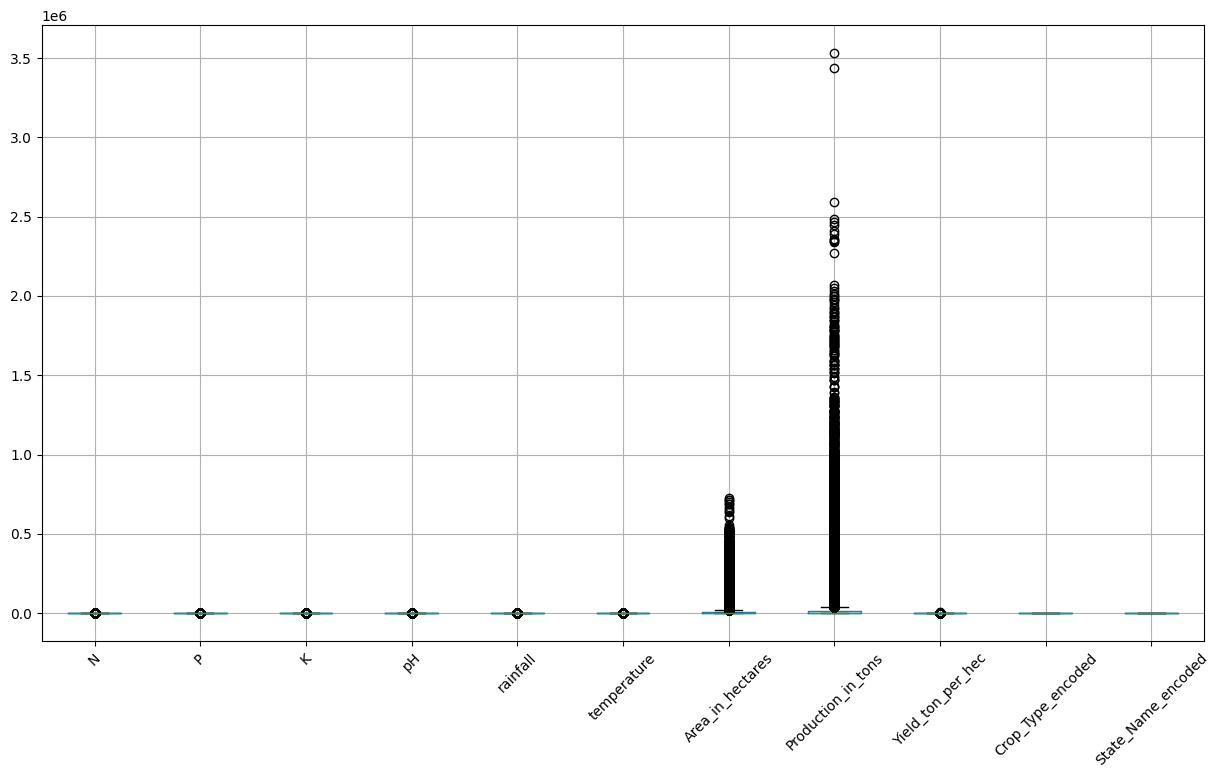

In [16]:
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

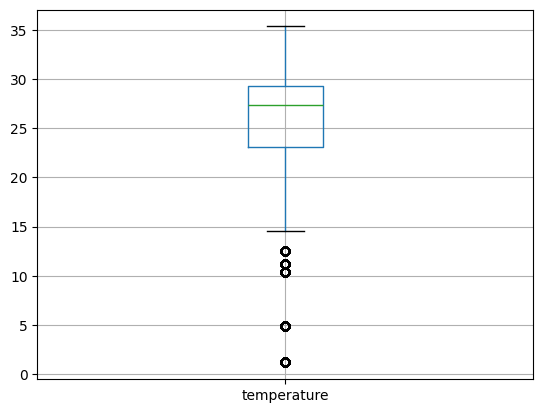

In [17]:
df.boxplot(column=['temperature'])
plt.show()

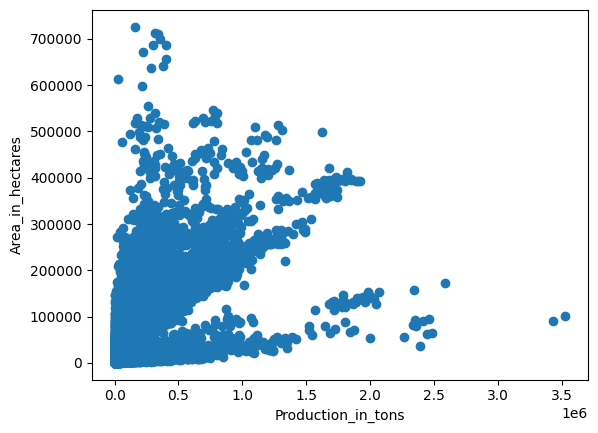

In [18]:
plt.scatter(df['Production_in_tons'], df['Area_in_hectares'])
plt.xlabel('Production_in_tons')
plt.ylabel('Area_in_hectares')
plt.show()

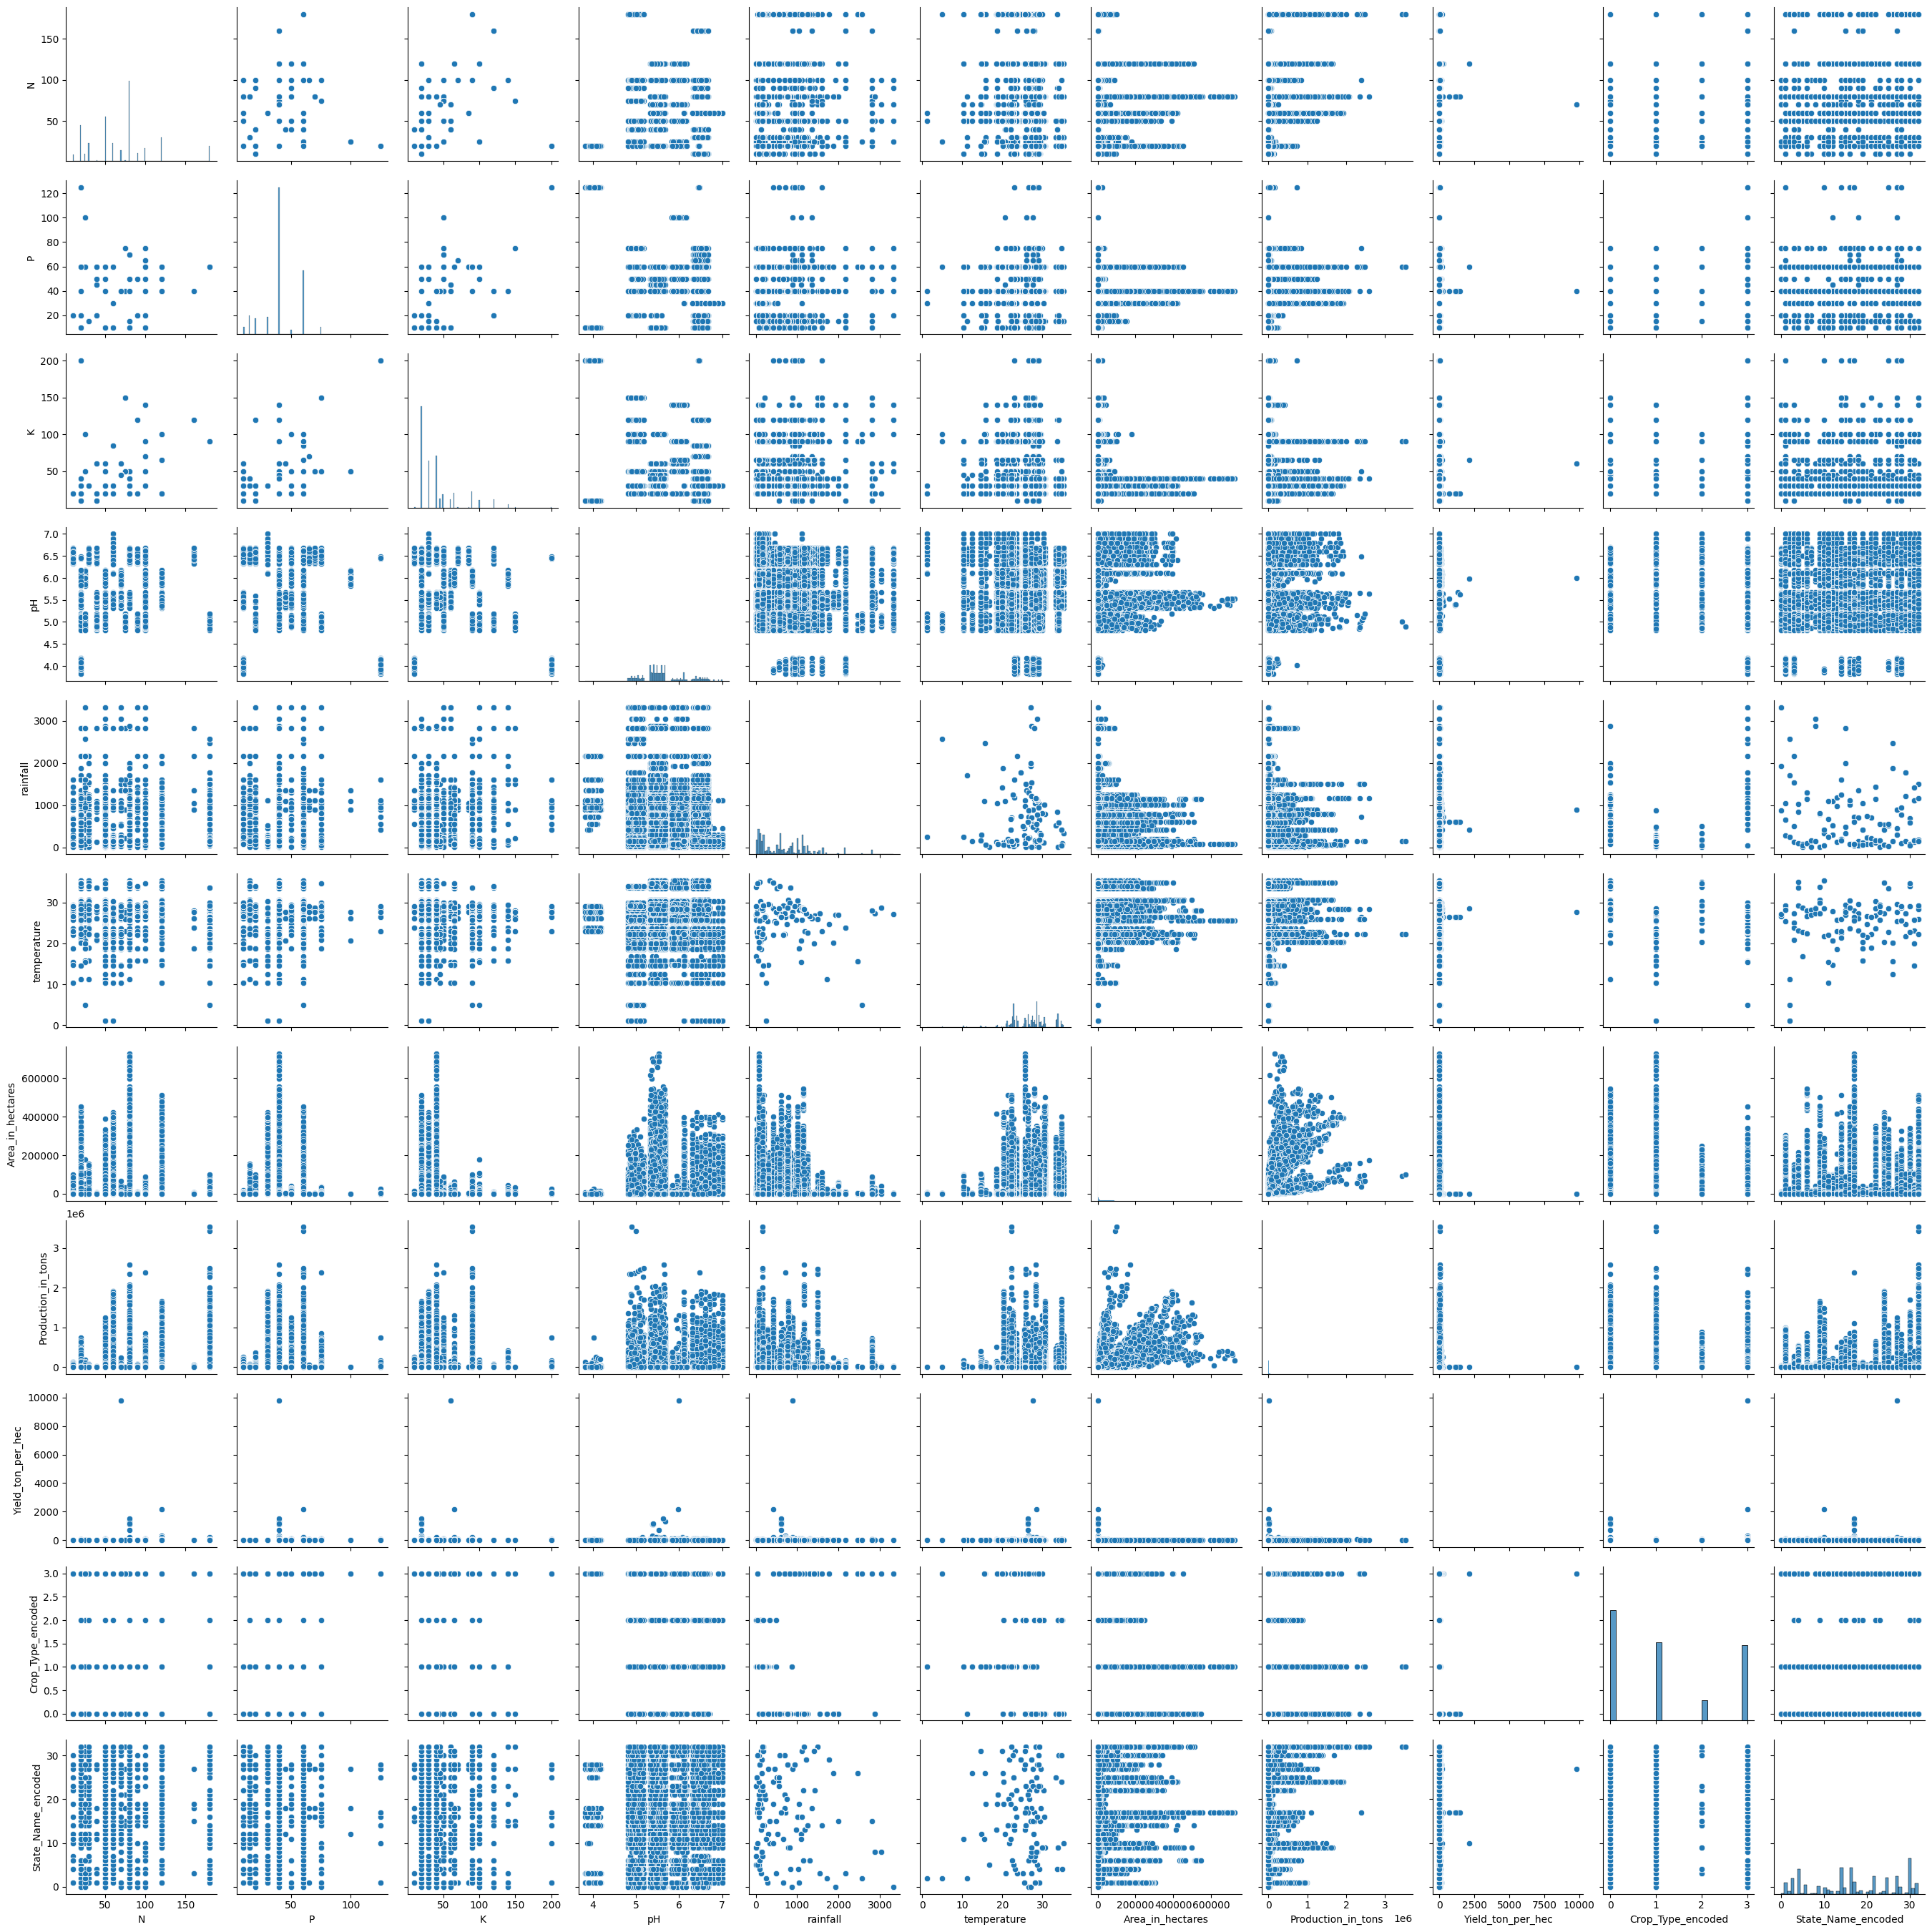

In [19]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [20]:
df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop_Type_encoded,State_Name_encoded
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04,99849.000000,99849.000000,99849.000000
mean,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04,3.931149,1.212471,17.393775
std,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05,33.872242,1.213851,9.780326
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000,0.000000,0.000000
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02,0.586207,0.000000,9.000000
50%,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03,1.329268,1.000000,16.000000
75%,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04,2.997288,3.000000,27.000000
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000,3.000000,32.000000


In [21]:
df.corr()


,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop_Type_encoded,State_Name_encoded
N,1.000000,0.342521,0.486650,-0.235437,0.111900,-0.044755,0.009287,0.097888,0.090223,0.220139,-0.020246
P,0.342521,1.000000,0.210349,-0.254776,0.110686,-0.056988,-0.057514,-0.010698,0.076806,0.130361,-0.030963
K,0.486650,0.210349,1.000000,-0.246708,0.369173,-0.078606,-0.120388,-0.026379,0.076198,0.544159,-0.036064
pH,-0.235437,-0.254776,-0.246708,1.000000,-0.021997,0.012203,0.060136,0.073654,0.006427,-0.004876,0.001849
rainfall,0.111900,0.110686,0.369173,-0.021997,1.000000,0.034479,-0.135261,-0.097948,0.026492,0.298686,-0.242691
temperature,-0.044755,-0.056988,-0.078606,0.012203,0.034479,1.000000,-0.012948,-0.023199,0.002176,-0.121185,0.140536
Area_in_hectares,0.009287,-0.057514,-0.120388,0.060136,-0.135261,-0.012948,1.000000,0.736019,-0.018287,-0.179004,0.059087
Production_in_tons,0.097888,-0.010698,-0.026379,0.073654,-0.097948,-0.023199,0.736019,1.000000,0.028306,-0.073743,0.099769
Yield_ton_per_hec,0.090223,0.076806,0.076198,0.006427,0.026492,0.002176,-0.018287,0.028306,1.000000,0.078267,0.008045
Crop_Type_encoded,0.220139,0.130361,0.544159,-0.004876,0.298686,-0.121185,-0.179004,-0.073743,0.078267,1.000000,-0.051421


In [22]:
import matplotlib.pyplot as plt

df.corr()
plt.show()

<Axes: >

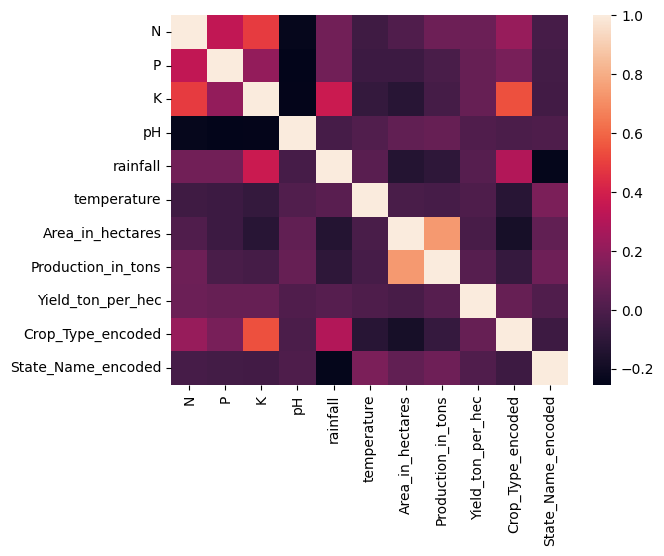

In [23]:
import seaborn as sns

sns.heatmap(df.corr())

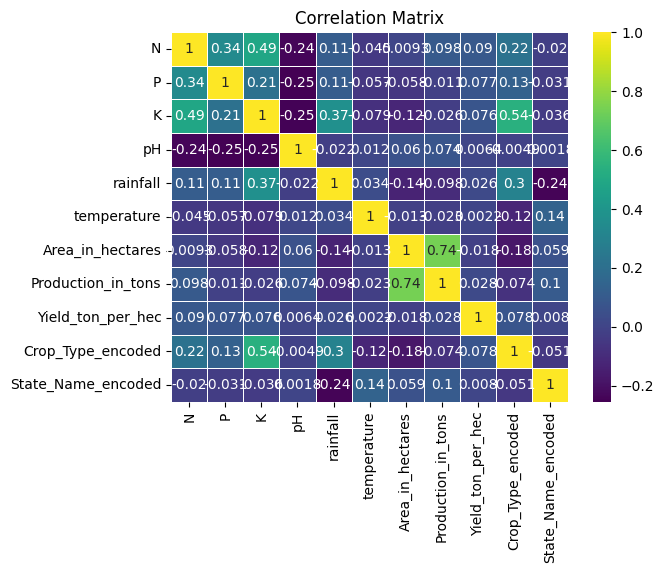

In [24]:
# heatmap

sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

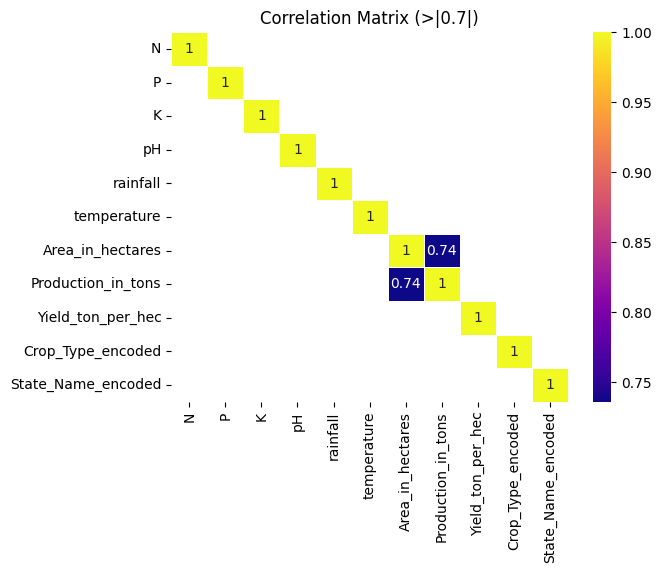

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N                   99849 non-null  int64  
 1   P                   99849 non-null  int64  
 2   K                   99849 non-null  int64  
 3   pH                  99849 non-null  float64
 4   rainfall            99849 non-null  float64
 5   temperature         99849 non-null  float64
 6   Area_in_hectares    99849 non-null  float64
 7   Production_in_tons  99849 non-null  float64
 8   Yield_ton_per_hec   99849 non-null  float64
 9   Crop_Type_encoded   99849 non-null  float64
 10  State_Name_encoded  99849 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 8.4 MB


In [25]:
mask = (df.corr() > 0.7)


filtered_correlation_matrix = df.corr().where(mask)


sns.heatmap(filtered_correlation_matrix, annot=True, cmap="plasma", linewidths=.5)
plt.title("Correlation Matrix (>|0.7|)")
plt.show()
df.info()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N                   99849 non-null  int64  
 1   P                   99849 non-null  int64  
 2   K                   99849 non-null  int64  
 3   pH                  99849 non-null  float64
 4   rainfall            99849 non-null  float64
 5   temperature         99849 non-null  float64
 6   Area_in_hectares    99849 non-null  float64
 7   Production_in_tons  99849 non-null  float64
 8   Yield_ton_per_hec   99849 non-null  float64
 9   Crop_Type_encoded   99849 non-null  float64
 10  State_Name_encoded  99849 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 8.4 MB


In [27]:
columns_to_convert = ['N', 'P', 'K']
for col in columns_to_convert:
    if col in df.columns and df[col].dtype == np.int64:
        df[col] = df[col].astype(np.int32)

In [28]:
columns_to_convert = ['pH', 'rainfall', 'temperature', 'Production_in_tons', 'Yield_ton_per_hec','Area_in_hectares']
for col in columns_to_convert:
    if col in df.columns and df[col].dtype == np.float64:
        df[col] = df[col].astype(np.int32)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N                   99849 non-null  int32  
 1   P                   99849 non-null  int32  
 2   K                   99849 non-null  int32  
 3   pH                  99849 non-null  int32  
 4   rainfall            99849 non-null  int32  
 5   temperature         99849 non-null  int32  
 6   Area_in_hectares    99849 non-null  int32  
 7   Production_in_tons  99849 non-null  int32  
 8   Yield_ton_per_hec   99849 non-null  int32  
 9   Crop_Type_encoded   99849 non-null  float64
 10  State_Name_encoded  99849 non-null  float64
dtypes: float64(2), int32(9)
memory usage: 5.0 MB


In [30]:
columns_to_convert = ['Crop_encoded','Crop_Type_encoded','State_Name_encoded']
for col in columns_to_convert:
    if col in df.columns and df[col].dtype == np.float64:
        df[col] = df[col].astype(np.int32)

In [31]:
X = df.drop('Yield_ton_per_hec', axis=1)  # Features
y = df['Yield_ton_per_hec']  # Target variable

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (79879, 10)
X_test shape: (19970, 10)
y_train shape: (79879,)
y_test shape: (19970,)


In [33]:

y_train = y_train.replace([np.inf, -np.inf], np.nan)

# Option 1: Remove rows with NaN values
# X_train = X_train[y_train.notna()]
# y_train = y_train[y_train.notna()]

# Option 2: Impute NaN values with the mean or median
y_train = y_train.fillna(y_train.mean())  # Or use y_train.median()

models = [RandomForestRegressor(), LinearRegression(), ElasticNet(), KNeighborsRegressor(), xgb.XGBRegressor(), Ridge()]
scores = dict()

for model in models:  # Changed 'models' to 'model' in the loop
    # Replace infinite or overly large values in X_train with NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    # Impute NaN values with the mean
    X_train = X_train.fillna(X_train.mean())

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)

    print(f'model: {str(model)}')
    print(f'RMSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-' * 30, '\n')

[ 0.    1.97  0.92 ... 44.11  0.    2.46]
model: RandomForestRegressor()
RMSE: 231.63734982974472
MAE: 0.43718928392588885
------------------------------ 

[ 7.97099903  2.91351031  3.33831924 ...  5.90497894 -1.61925782
  7.52379553]
model: LinearRegression()
RMSE: 356.99550586871
MAE: 3.2720702921943072
------------------------------ 

[ 5.17188287  3.39706856  3.90890374 ...  5.02848308 -2.32480246
  6.76733207]
model: ElasticNet()
RMSE: 358.5866220385965
MAE: 3.2468255119360228
------------------------------ 

[ 0.   2.   0.8 ... 38.2  0.   2.2]
model: KNeighborsRegressor()
RMSE: 320.9850736104156
MAE: 0.7190986479719579
------------------------------ 

[-0.7557598   1.5376414   0.87374455 ... 72.46005    -0.07593659
  2.1388752 ]
model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=

In [34]:
# ... your existing code ...

model = xgb.XGBRegressor()  # Initialize the XGBoost model
model.fit(X_train, y_train)  # Fit the model with your training data

# Predict on the test data to avoid implicit display of the model
y_pred = model.predict(X_test)

# ... (rest of your code where you actually use y_pred)...

In [35]:
# ... your existing code ...

# Import XGBoost
import xgboost as xgb

model = xgb.XGBRegressor()  # Initialize the XGBoost model
model.fit(X_train, y_train)  # Fit the model with your training data

# Predict on the test data to avoid implicit display of the model
y_pred = model.predict(X_test)

# ... (rest of your code where you actually use y_pred)...

In [36]:
!pip install scikit-learn==1.3.1

In [42]:
# Define input widgets for each feature
N_input = widgets.IntText(description="N:")
P_input = widgets.IntText(description="P:")
K_input = widgets.IntText(description="K:")
temperature_input = widgets.FloatText(description="Temperature:")
pH_input = widgets.FloatText(description="pH:")
area_input = widgets.IntText(description="Area (hectares):")
rainfall_input = widgets.FloatText(description="Rainfall:")
production_input = widgets.FloatText(description="Production (tons):")

# Add widgets for the encoded categorical features (using LabelEncoder output)
state_name_encoded_label_input = widgets.IntText(description="State Name Encoded (Label):")
crop_type_encoded_label_input = widgets.IntText(description="Crop Type Encoded (Label):")
crop_encoded_label_input = widgets.IntText(description="Crop Encoded (Label):")


# Function to handle prediction when button is clicked
def predict_on_input(b):
    input_data = pd.DataFrame({
        'N': [N_input.value],
        'P': [P_input.value],
        'K': [K_input.value],
        'temperature': [temperature_input.value],
        'pH': [pH_input.value],
        'Area_in_hectares': [area_input.value],
        'rainfall': [rainfall_input.value],
        'Production_in_tons': [production_input.value],
        # Include the new LabelEncoded categorical features
        'State_Name_encoded_label': [state_name_encoded_label_input.value],
        'Crop_Type_encoded_label': [crop_type_encoded_label_input.value],
        'Crop_encoded_label': [crop_encoded_label_input.value]
    })

    # Ensure the order of columns matches the training data (X_train)
    # It's crucial that this list exactly matches the columns used to train your model
    # You can get the correct column order from X_train.columns after dropping
    # the original categorical columns and adding the new encoded ones.
    # For demonstration, assuming these are the columns:
    expected_columns = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
                        'State_Name_encoded_label', 'Crop_Type_encoded_label', 'Crop_encoded_label']
    input_data = input_data[expected_columns]


    predictions = model.predict(input_data)
    print("Predicted Value:", predictions[0])


# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_on_input)

# Display the input widgets and button, including the new widgets
display(N_input, P_input, K_input, temperature_input, pH_input, area_input, rainfall_input, production_input,
        state_name_encoded_label_input, crop_type_encoded_label_input, crop_encoded_label_input, predict_button)

IntText(value=0, description='N:')

IntText(value=0, description='P:')

IntText(value=0, description='K:')

FloatText(value=0.0, description='Temperature:')

FloatText(value=0.0, description='pH:')

IntText(value=0, description='Area (hectares):')

FloatText(value=0.0, description='Rainfall:')

FloatText(value=0.0, description='Production (tons):')

IntText(value=0, description='State Name Encoded (Label):')

IntText(value=0, description='Crop Type Encoded (Label):')

IntText(value=0, description='Crop Encoded (Label):')

Button(description='Predict', style=ButtonStyle())

In [45]:
# Define input widgets for each feature
N_input = widgets.IntText(description="N:")
P_input = widgets.IntText(description="P:")
K_input = widgets.IntText(description="K:")
temperature_input = widgets.FloatText(description="Temperature:")
pH_input = widgets.FloatText(description="pH:")
area_input = widgets.IntText(description="Area (hectares):")
rainfall_input = widgets.FloatText(description="Rainfall:")
# Assuming 'Production_in_tons' is a necessary feature, include it as well:
production_input = widgets.FloatText(description="Production (tons):") # Placeholder for now, consider its actual purpose

# Dropdown widgets for categorical features
state_input = widgets.Dropdown(
    options=df['State_Name'].unique().tolist(),
    description="State:"
)
crop_type_input = widgets.Dropdown(
    options=df['Crop_Type'].unique().tolist(),
    description="Crop Type:"
)
crop_input = widgets.Dropdown(
    options=df['Crop'].unique().tolist(),
    description="Crop:"
)

# Function to handle prediction when button is clicked
def predict_on_input(b):
    input_data = pd.DataFrame({
        'N': [N_input.value],
        'P': [P_input.value],
        'K': [K_input.value],
        'temperature': [temperature_input.value],
        'pH': [pH_input.value],
        'Area_in_hectares': [area_input.value],
        'rainfall': [rainfall_input.value],
        'Production_in_tons': [production_input.value],
        'State_Name': [state_input.value],  # Get selected state
        'Crop_Type': [crop_type_input.value],  # Get selected crop type
        'Crop': [crop_input.value]  # Get selected crop
    })

    # Encode categorical features
    input_data['State_Name_Encoded'] = state_encoder.transform(input_data['State_Name'])
    input_data['Crop_Type_Encoded'] = crop_type_encoder.transform(input_data['Crop_Type'])
    input_data['Crop_Encoded'] = crop_encoder.transform(input_data['Crop'])

    # Ensure the order of columns matches the training data
    input_data = input_data[['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
                            'State_Name_Encoded', 'Crop_Type_Encoded', 'Crop_Encoded']]  # Added encoded features

    predictions = model.predict(input_data)
    predicted_value = predictions[0]*907.185
    print("Predicted Value in tons:", predictions[0])


# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_on_input)

# Display the input widgets and button
display(N_input, P_input, K_input, temperature_input, pH_input, area_input,
        rainfall_input, production_input, state_input, crop_type_input, crop_input, predict_button)

KeyError: 'State_Name'

In [38]:
y_pred = model.predict(X_test)